In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
import math

In [6]:
cancer_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/risk_factors_cervical_cancer.csv')

In [7]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [9]:
## dropping two columns of STDs as it does not give much information because of missing data

cancer_df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [10]:
cancer_df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [11]:
cancer_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [12]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS',
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN',
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [13]:
cancer_df = cancer_df.replace('?', np.NaN)

In [15]:
### Filling the missing values of numeric data columns with mean of the column data.
for feature in numerical_df:
    # Convert the values in the Series to numeric type
    cancer_df[feature] = pd.to_numeric(cancer_df[feature], errors='coerce')

    # Calculate the mean of the column data and fill missing values with it
    feature_mean = round(cancer_df[feature].mean(), 1)
    print(feature, '', feature_mean)
    cancer_df[feature] = cancer_df[feature].fillna(feature_mean)


Age  26.8
Number of sexual partners  2.5
First sexual intercourse  17.0
Num of pregnancies  2.3
Smokes (years)  1.2
Smokes (packs/year)  0.5
Hormonal Contraceptives (years)  2.3
IUD (years)  0.5
STDs (number)  0.2


In [17]:
for feature in categorical_df:
    # Fill missing values with a default value (e.g., 1.0)
    cancer_df[feature] = cancer_df[feature].fillna(1.0)


In [18]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [19]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


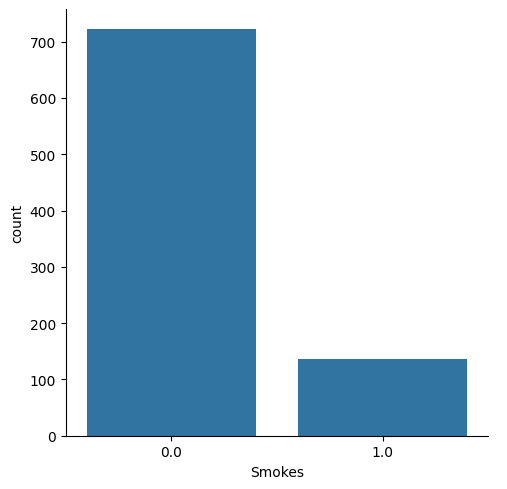

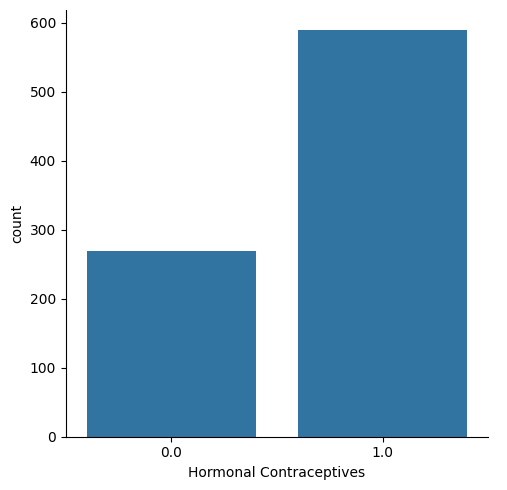

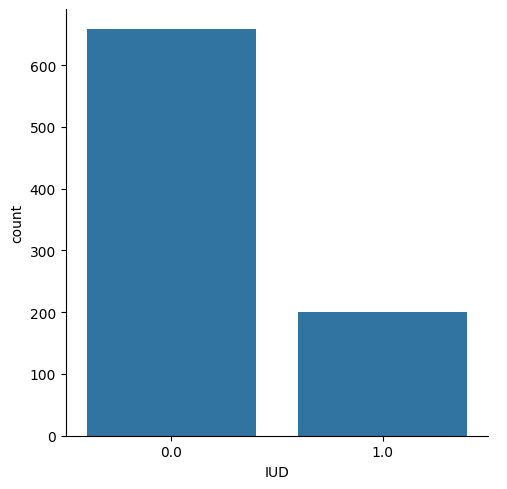

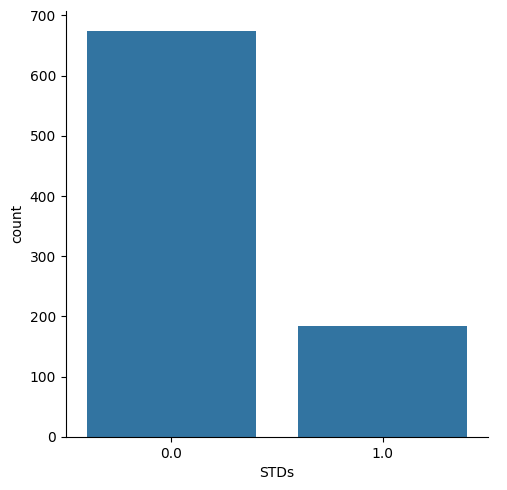

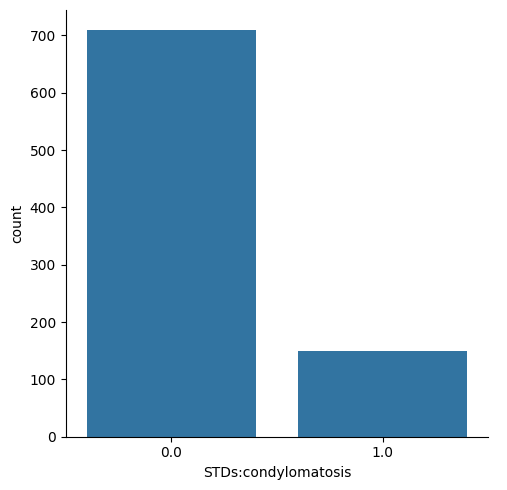

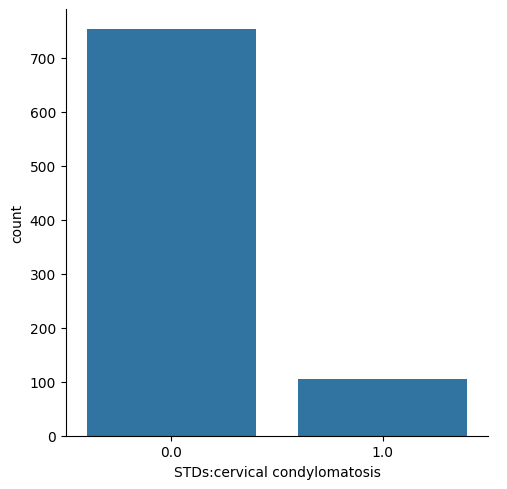

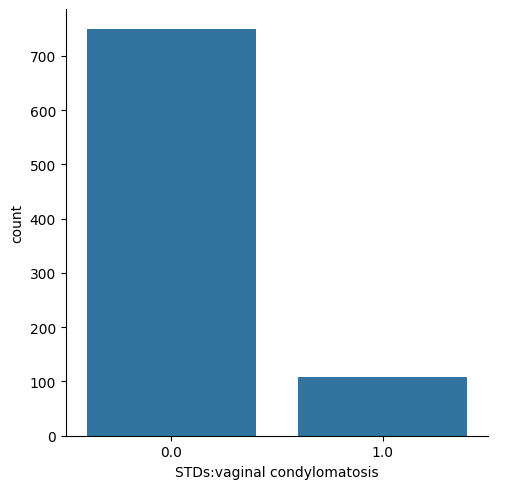

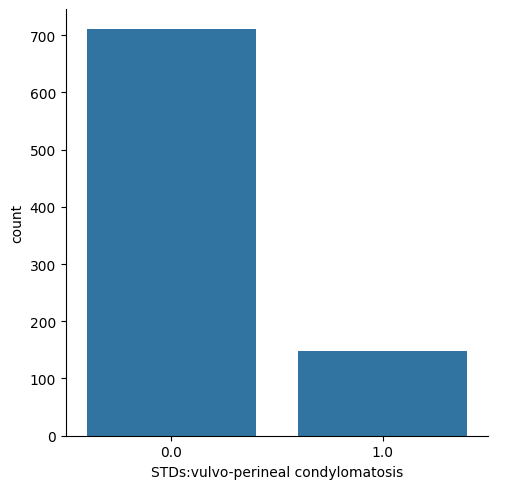

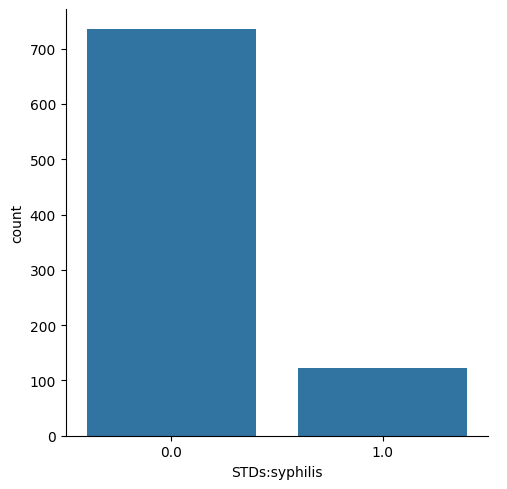

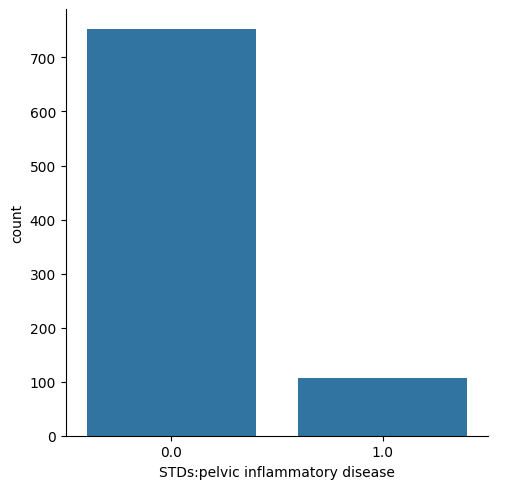

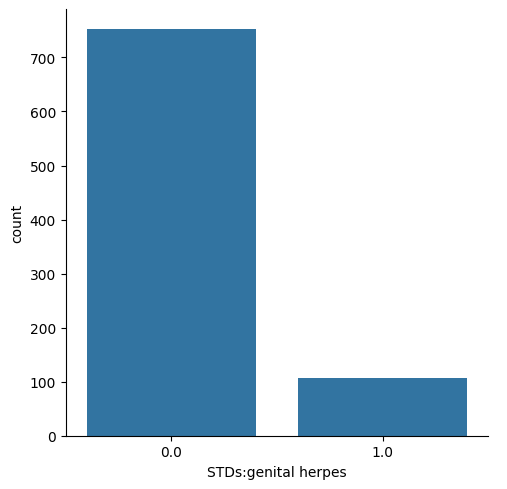

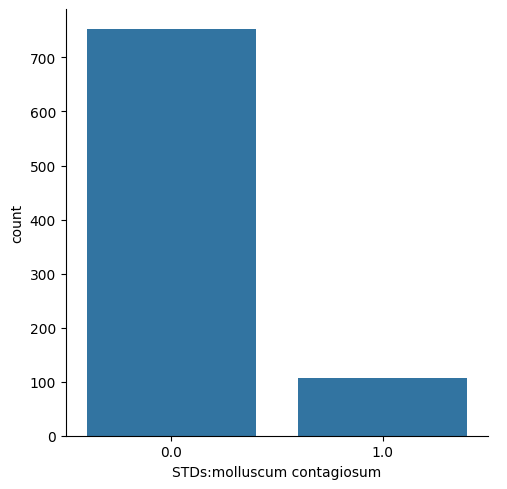

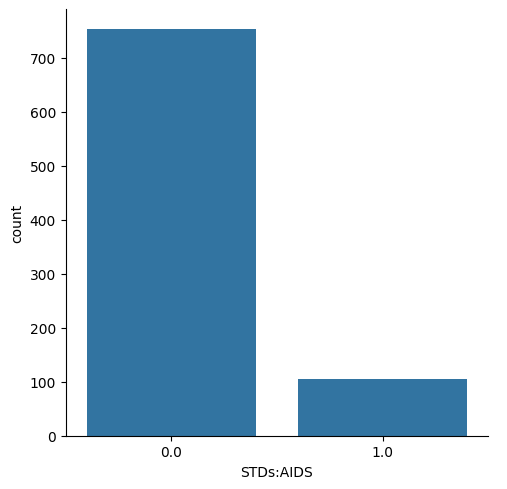

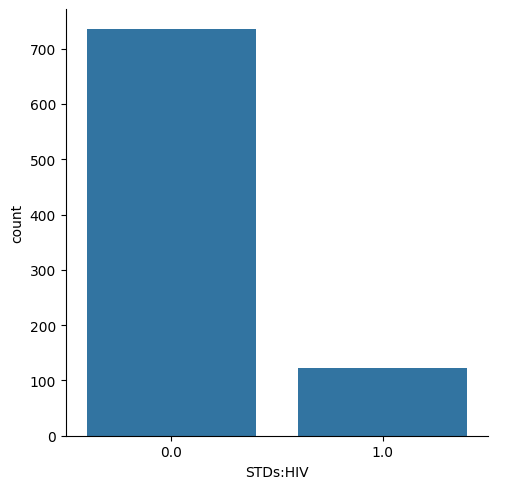

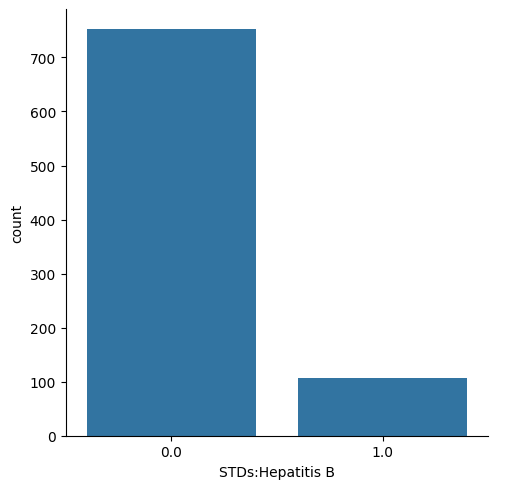

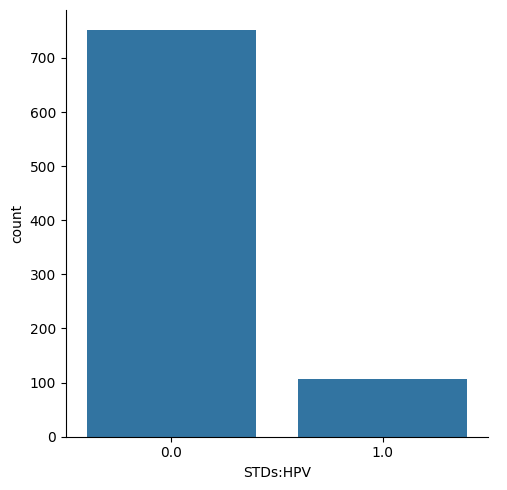

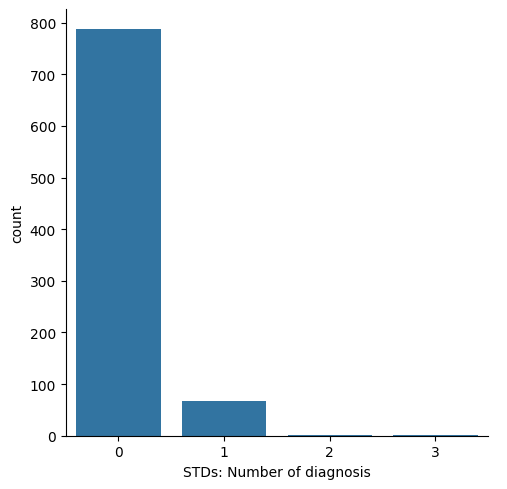

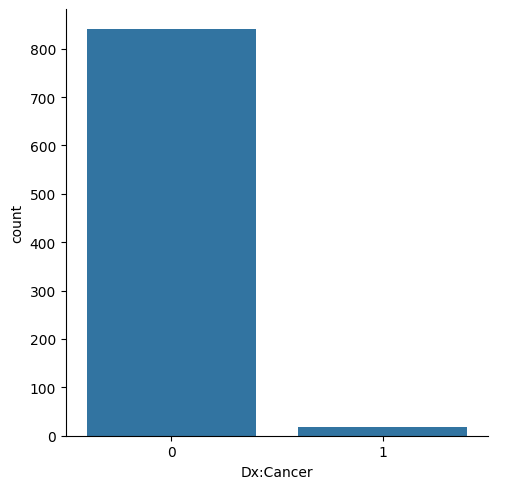

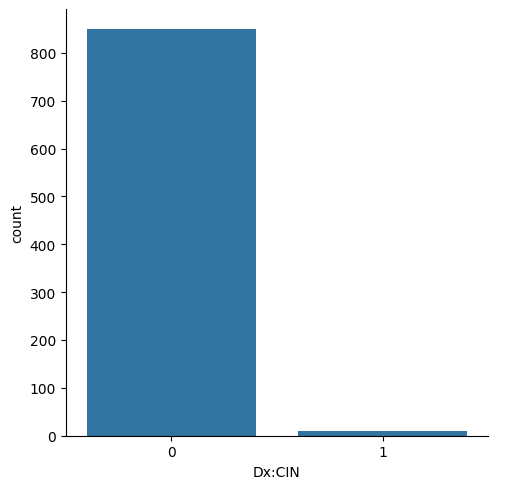

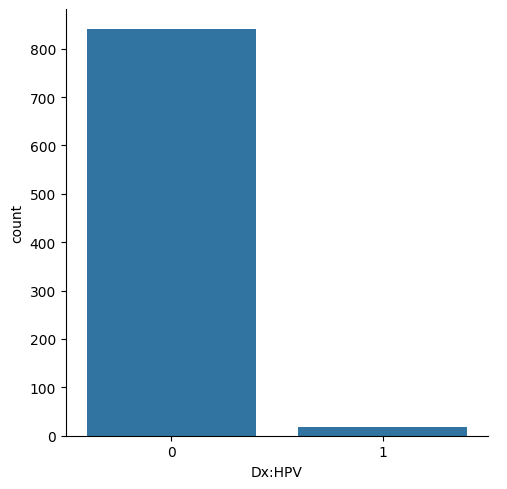

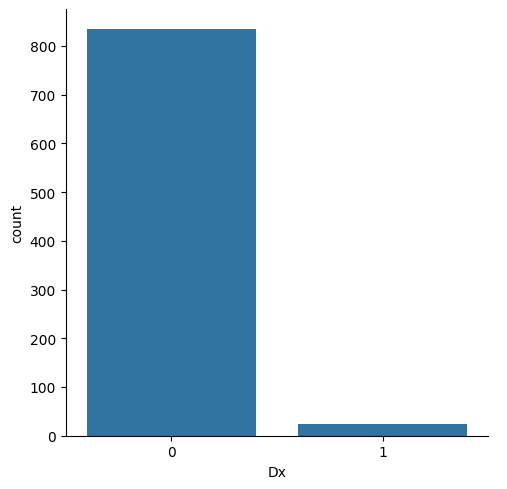

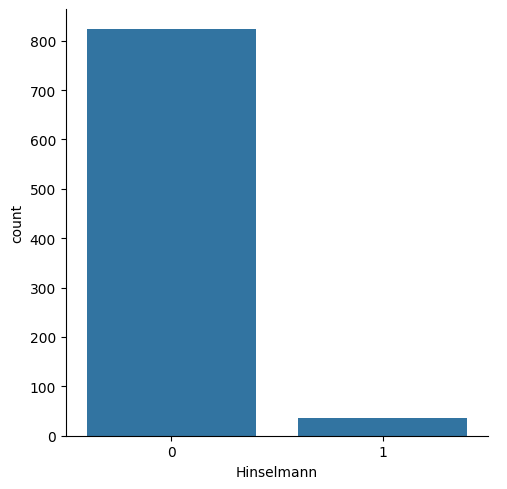

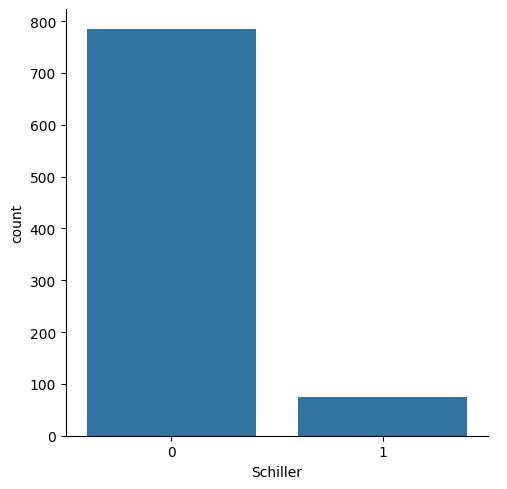

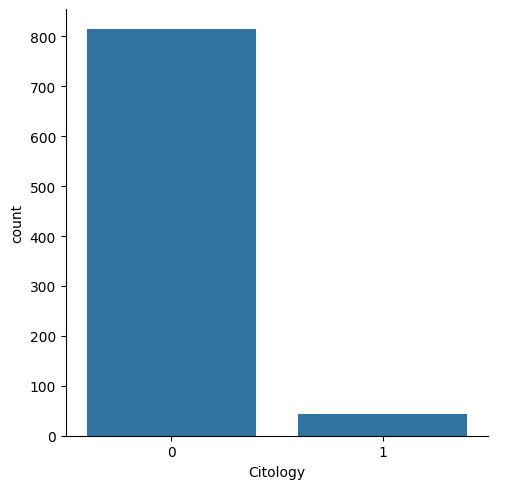

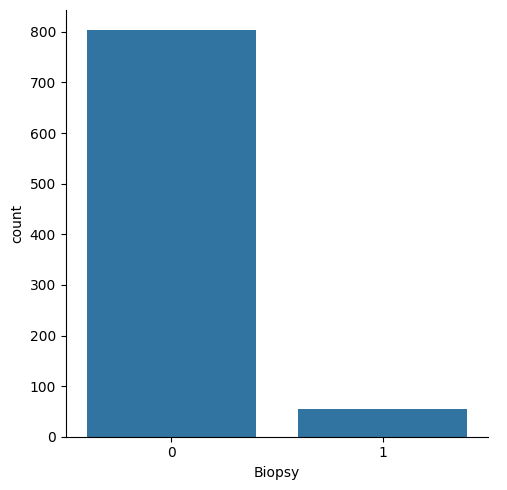

In [21]:
import seaborn as sns
for feature in categorical_df:
    sns.catplot(x=feature, data=cancer_df, kind='count')


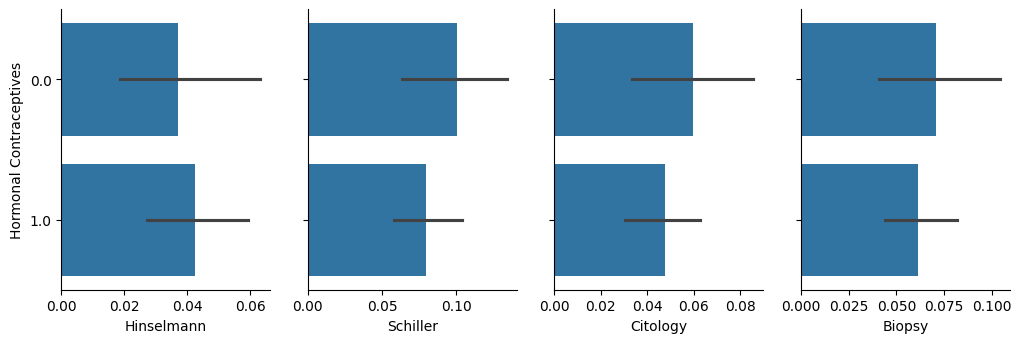

In [23]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars= category_df,
                 aspect=.75, height=3.5)
g.map(sns.barplot, palette="pastel");


In [27]:
cancer_df['Number of sexual partners'] = round(pd.to_numeric(cancer_df['Number of sexual partners'], errors='coerce'))
cancer_df['First sexual intercourse'] = pd.to_numeric(cancer_df['First sexual intercourse'], errors='coerce')
cancer_df['Num of pregnancies'] = round(pd.to_numeric(cancer_df['Num of pregnancies'], errors='coerce'))
cancer_df['Smokes'] = pd.to_numeric(cancer_df['Smokes'], errors='coerce')
cancer_df['Smokes (years)'] = pd.to_numeric(cancer_df['Smokes (years)'], errors='coerce')
cancer_df['Hormonal Contraceptives'] = pd.to_numeric(cancer_df['Hormonal Contraceptives'], errors='coerce')
cancer_df['Hormonal Contraceptives (years)'] = pd.to_numeric(cancer_df['Hormonal Contraceptives (years)'], errors='coerce')
cancer_df['IUD (years)'] = pd.to_numeric(cancer_df['IUD (years)'], errors='coerce')

Mean age of the Women facing the risk of Cervical cancer 26.82051282051282


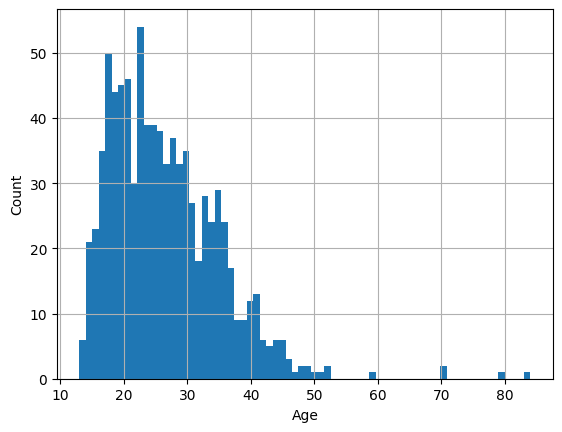

In [28]:
cancer_df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',cancer_df['Age'].mean())

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

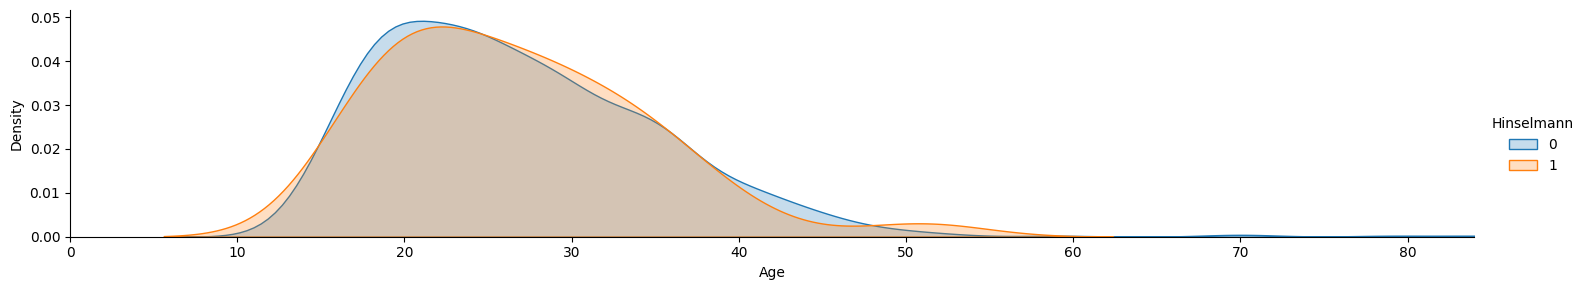

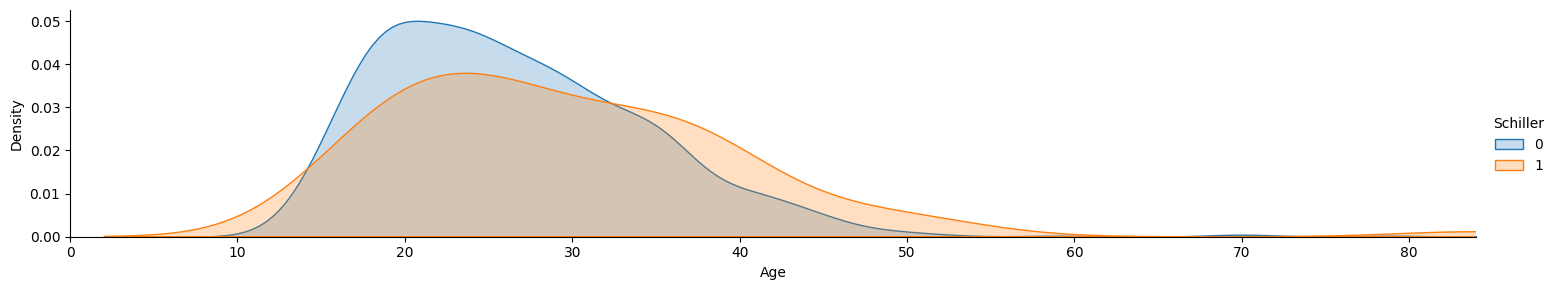

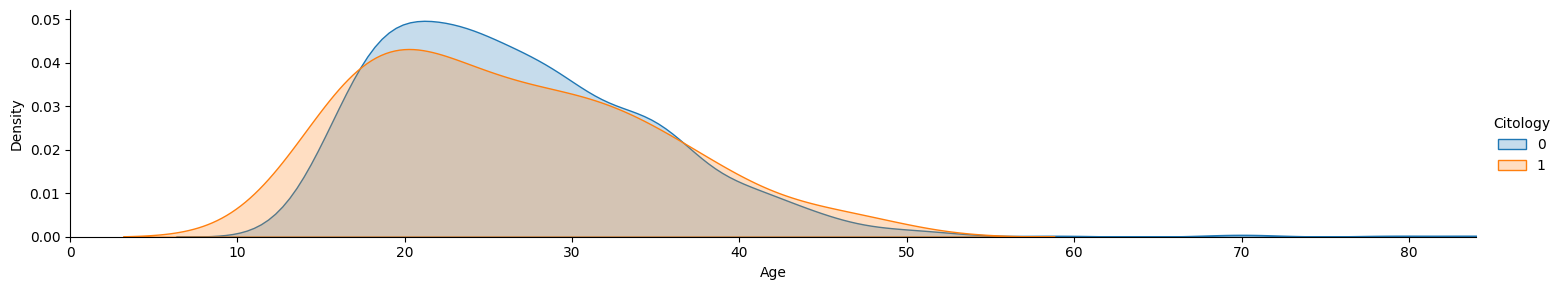

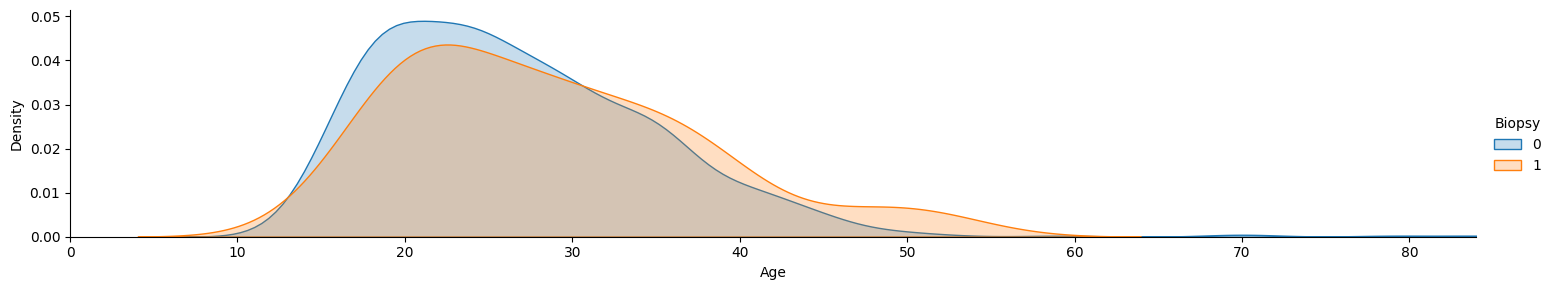

In [29]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Age',shade=True)

 oldest = cancer_df['Age'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

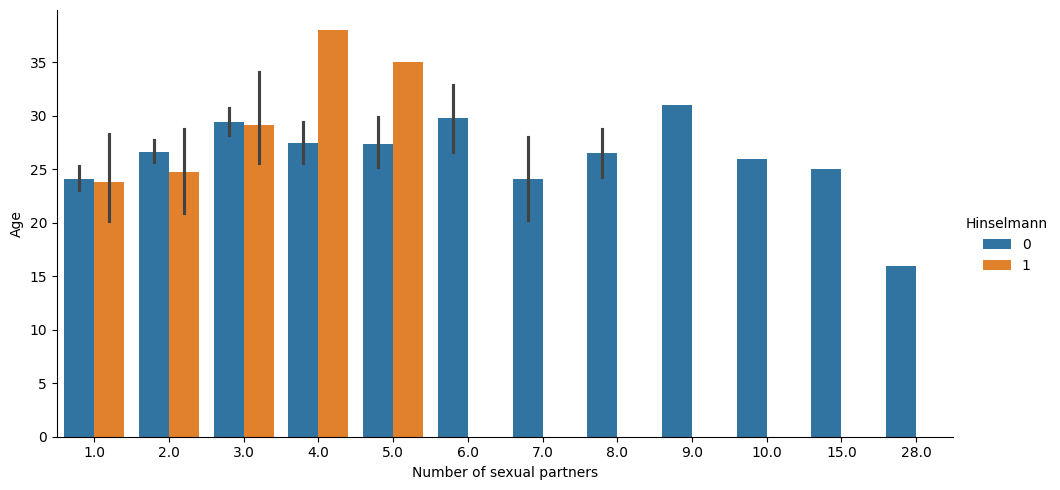

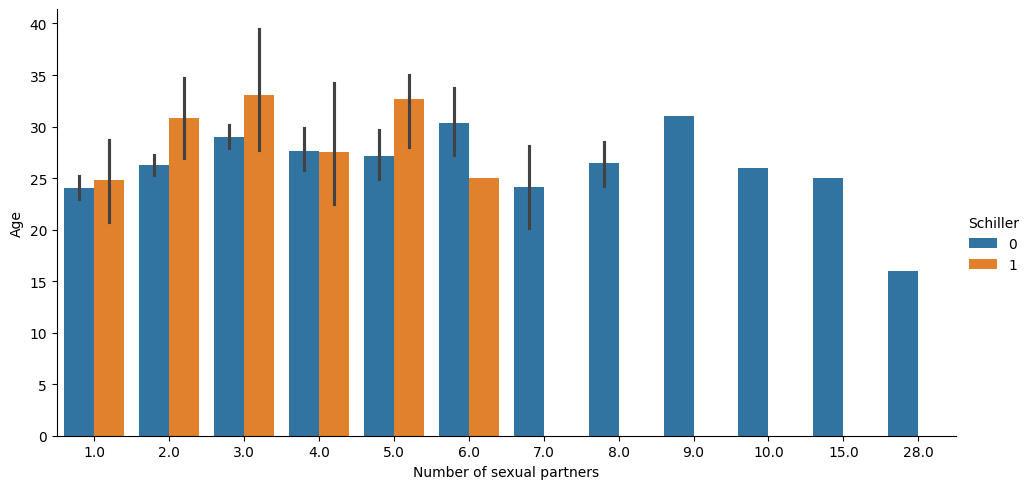

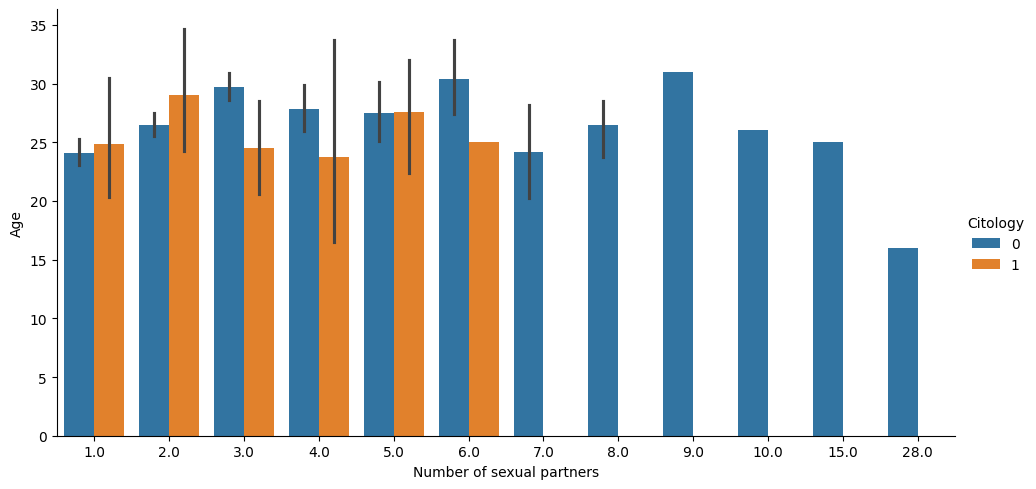

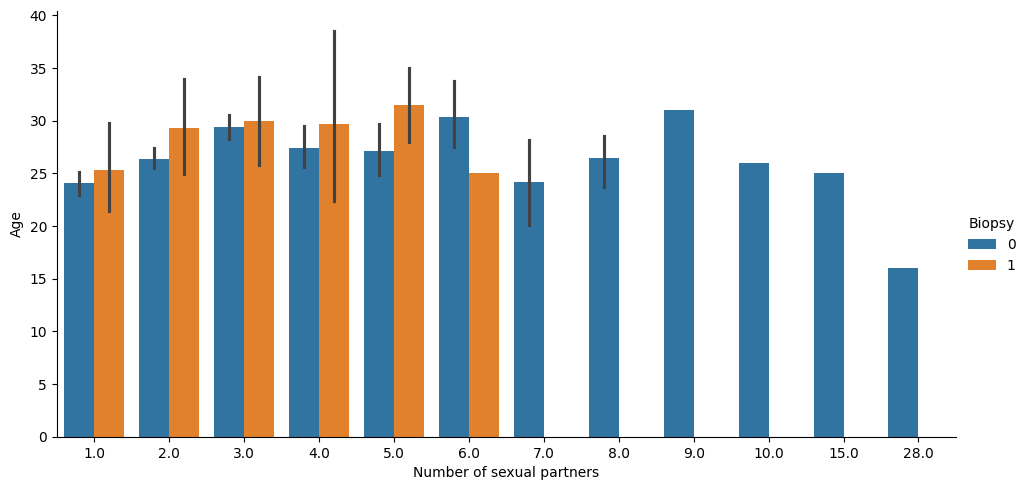

In [31]:
for feature in category_df:
    sns.catplot(x='Number of sexual partners', y='Age', hue=feature, data=cancer_df, aspect=1.95, kind='bar')


<ipython-input-33-16f4516ae1a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.to_numeric(cancer_df['First sexual intercourse'], errors='coerce'))


<Axes: xlabel='First sexual intercourse', ylabel='Density'>

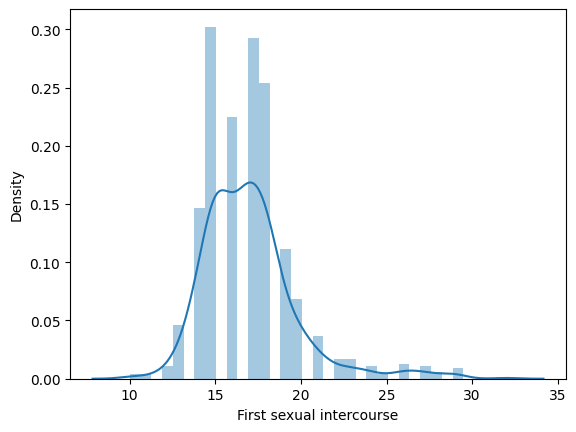

In [33]:
sns.distplot(pd.to_numeric(cancer_df['First sexual intercourse'], errors='coerce'))
#print('Mean age of the women who started the sexual intercourse', cancer_df['First sexual intercourse'].mean())


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

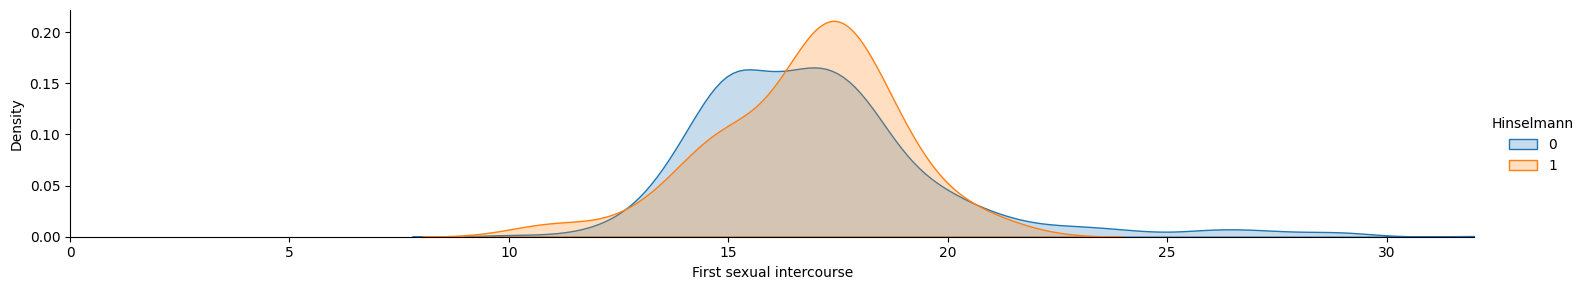

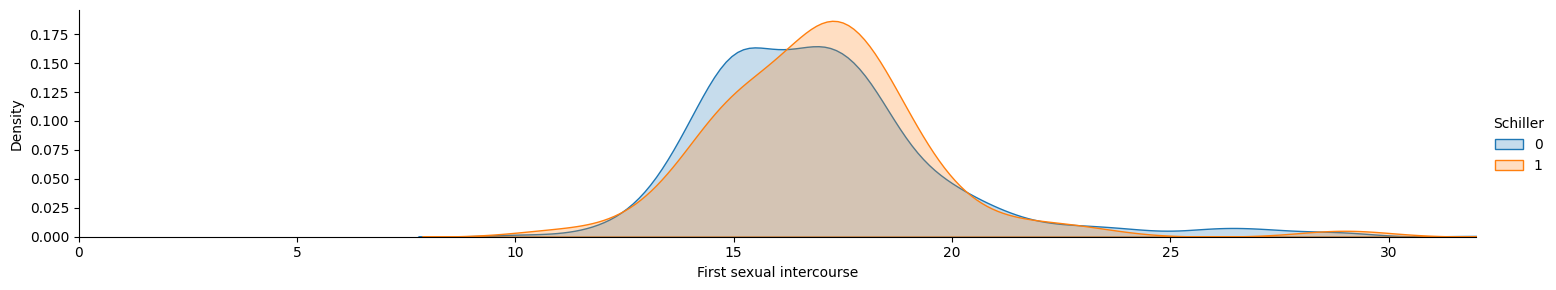

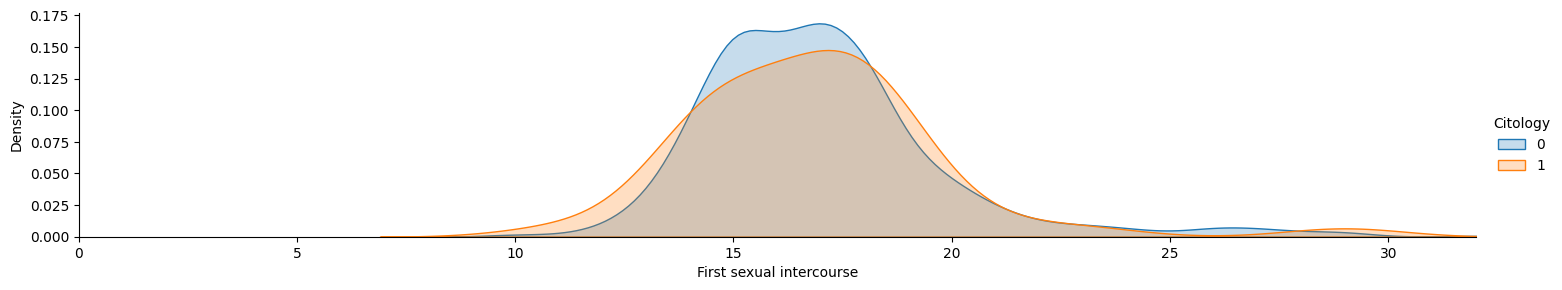

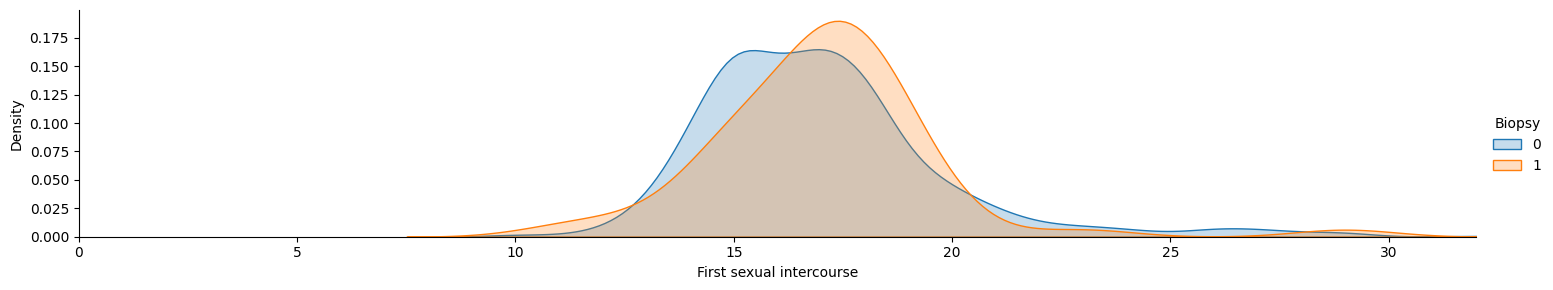

In [34]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'First sexual intercourse',shade=True)

 oldest = cancer_df['First sexual intercourse'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

In [38]:
preg_table = pd.crosstab(index=cancer_df["Hinselmann"],
                         columns=[cancer_df["Num of pregnancies"], cancer_df['Number of sexual partners']])
cancer_df['Combined_Column'] = cancer_df["Num of pregnancies"].astype(str) + '_' + cancer_df['Number of sexual partners'].astype(str)
preg_table = pd.crosstab(index=cancer_df["Hinselmann"], columns=cancer_df['Combined_Column'])
preg_table


Combined_Column,0.0_1.0,0.0_2.0,0.0_3.0,0.0_4.0,1.0_1.0,1.0_10.0,1.0_2.0,1.0_28.0,1.0_3.0,1.0_4.0,...,6.0_3.0,6.0_4.0,6.0_5.0,6.0_6.0,7.0_1.0,7.0_2.0,7.0_3.0,7.0_5.0,8.0_3.0,8.0_4.0
Hinselmann,,,,,,,,,,,,,,,,,,,,,
0,5,5,5,1,81,1,86,1,49,25,...,5,1,1,1,1,3,1,1,1,1
1,0,0,0,0,4,0,1,0,2,0,...,2,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Combined_Column', ylabel='Hinselmann'>

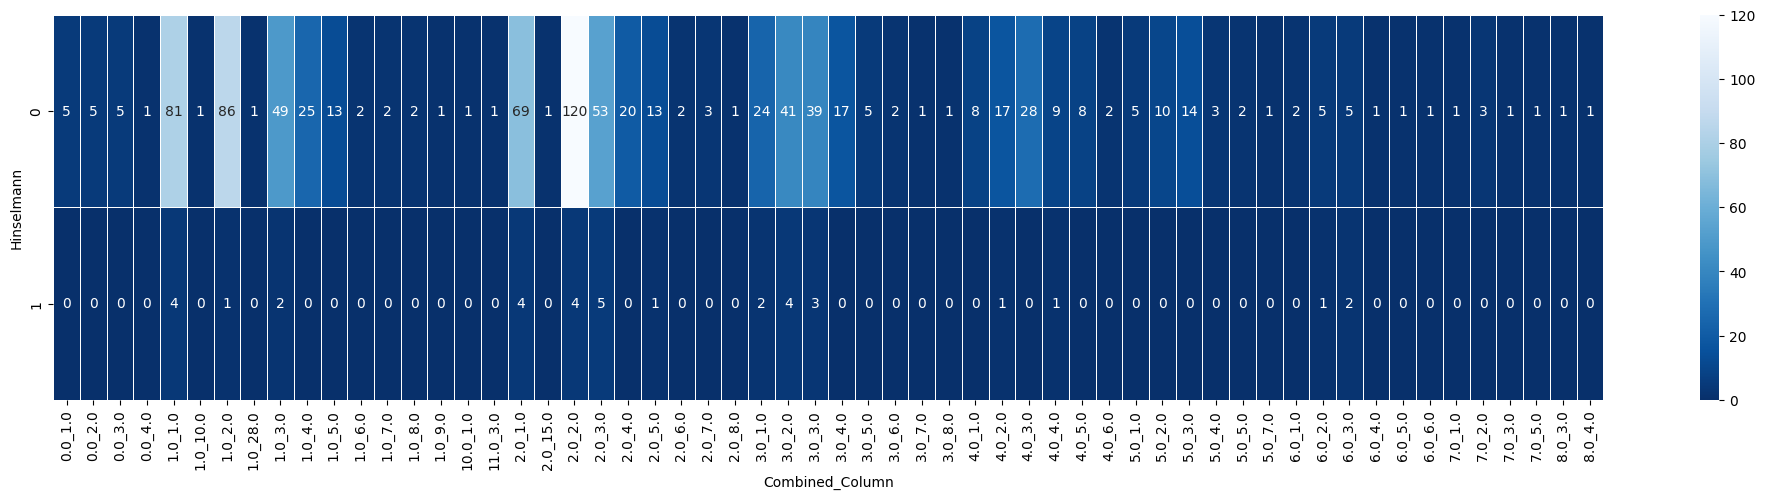

In [39]:
fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(preg_table,annot=True, fmt="d",cmap="Blues_r",linewidths=0.5,ax=ax)

In [40]:
##### Just checking to see if there is any relation between number of pregnancies and number of sexual partners
cancer_df['Number of sexual partners'].corr(cancer_df['Num of pregnancies'])

0.07743921250933397

In [42]:
cancer_df['Smokes (packs/year)'] = pd.to_numeric(cancer_df['Smokes (packs/year)'], errors='coerce')
print('Correlation between Smokes and Smokes (years) feature:', cancer_df['Smokes'].corr(cancer_df['Smokes (years)']))
print('Correlation between Smokes and Smokes (packs/year) feature:', cancer_df['Smokes'].corr(cancer_df['Smokes (packs/year)']))


Correlation between Smokes and Smokes (years) feature: 0.6927983105817407
Correlation between Smokes and Smokes (packs/year) feature: 0.4735240622738942


In [43]:
## removing the smokes column from the dataframe.

cancer_df.drop('Smokes',axis=1,inplace=True)

In [44]:
smokes_table = pd.crosstab(index=cancer_df["Schiller"],
                          columns=(cancer_df["Smokes (years)"]))
#smokes_table.to_csv('smokes.csv',sep=',')

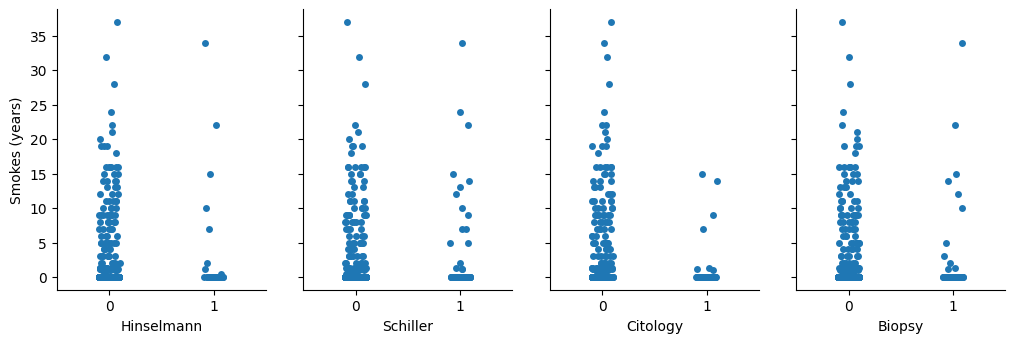

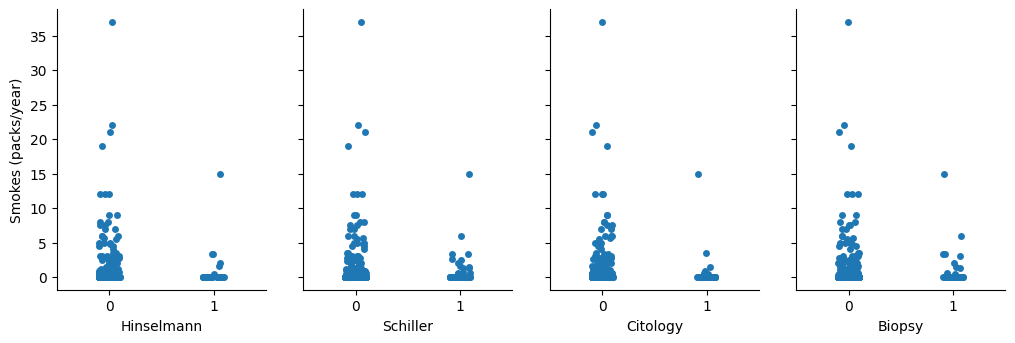

In [46]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (years)'],
                 x_vars= category_df,
                 aspect=.75, height=3.5)
g.map(sns.stripplot, palette="winter");

g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (packs/year)'],
                 x_vars= category_df,
                 aspect=.75, height=3.5)
g.map(sns.stripplot, palette="spring");


In [47]:
### Similar study as Smokes can be conducted for other features like Harmonal Contraceptives etc.


cancer_df.drop('Hormonal Contraceptives',axis=1,inplace=True)

In [48]:
harmones_table = pd.crosstab(index=cancer_df["Schiller"],
                          columns=(cancer_df["Hormonal Contraceptives (years)"]))
#harmones_table.to_csv('harmones.csv',sep=',')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

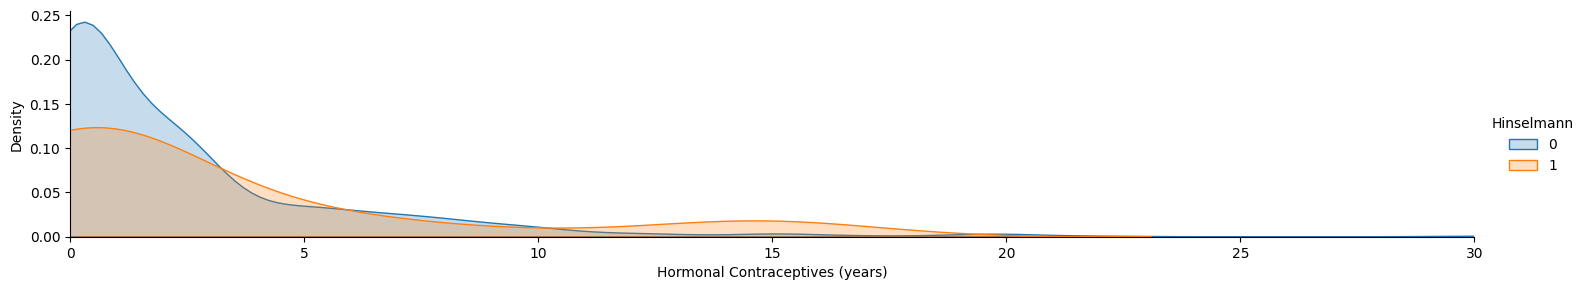

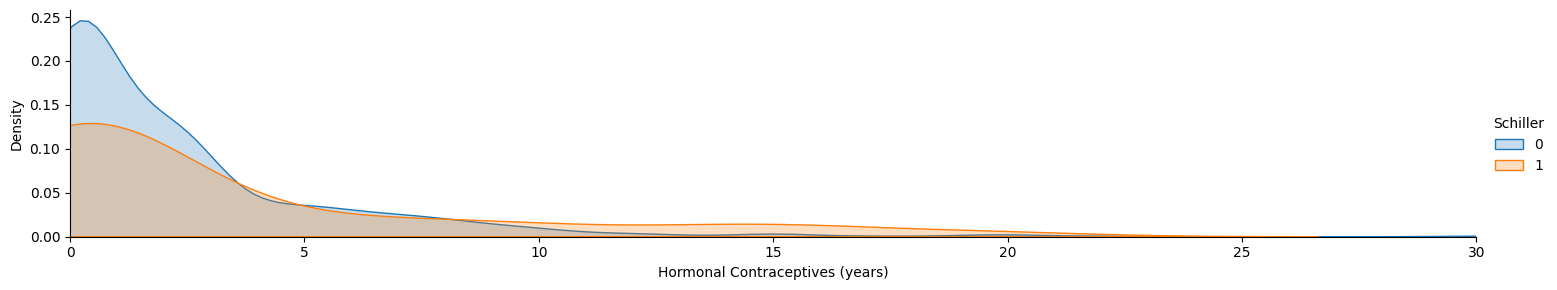

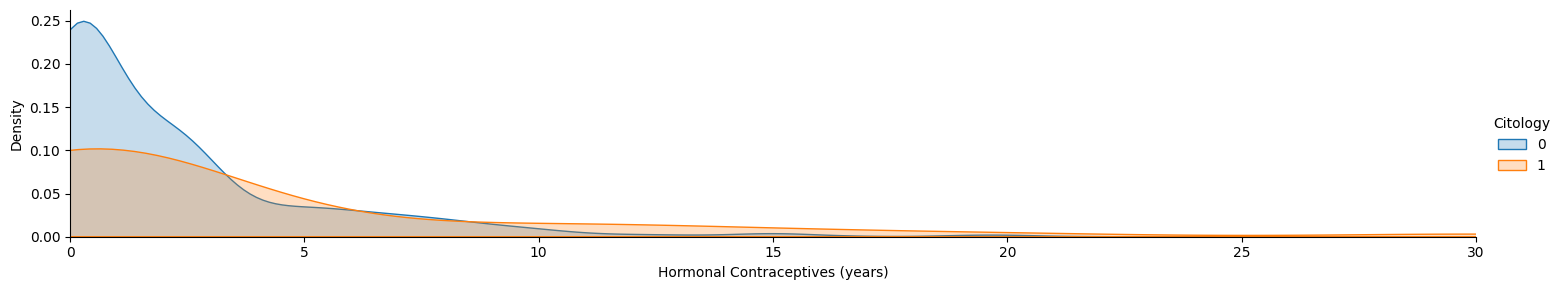

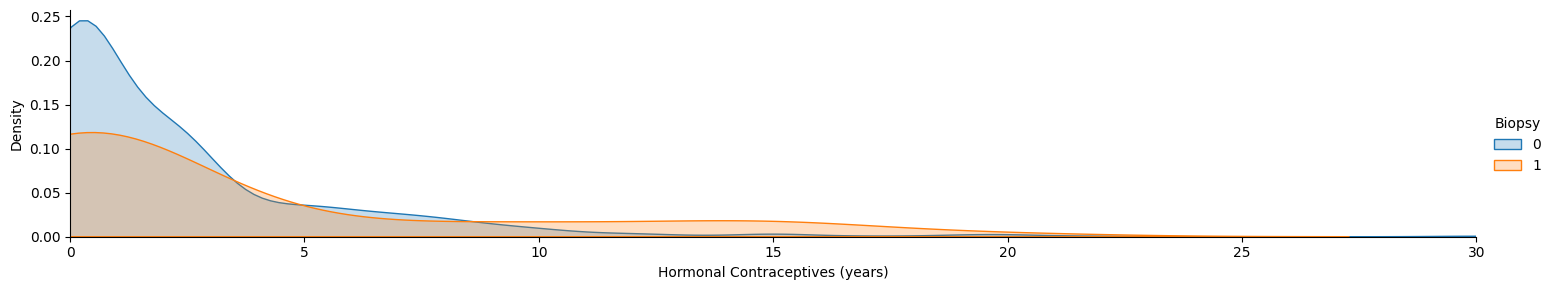

In [49]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Hormonal Contraceptives (years)',shade=True)

 oldest = cancer_df['Hormonal Contraceptives (years)'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()


In [50]:
### Dropping IUD column because IUD (years) has a non-zero value only if IUD is non-zero.

cancer_df.drop('IUD',axis=1,inplace=True)

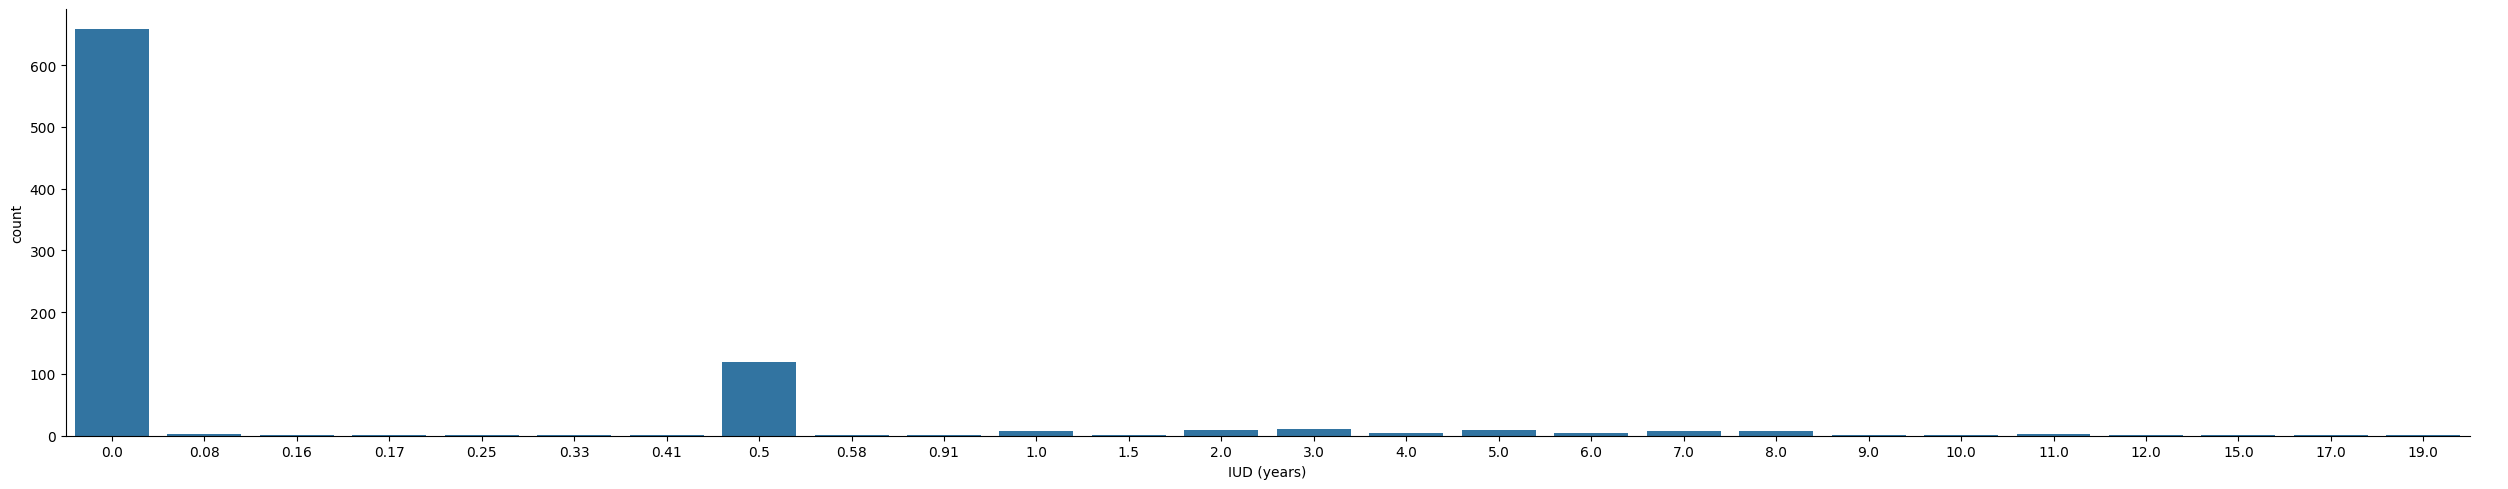

In [52]:
sns.catplot(x='IUD (years)', data=cancer_df, kind='count', aspect=5)


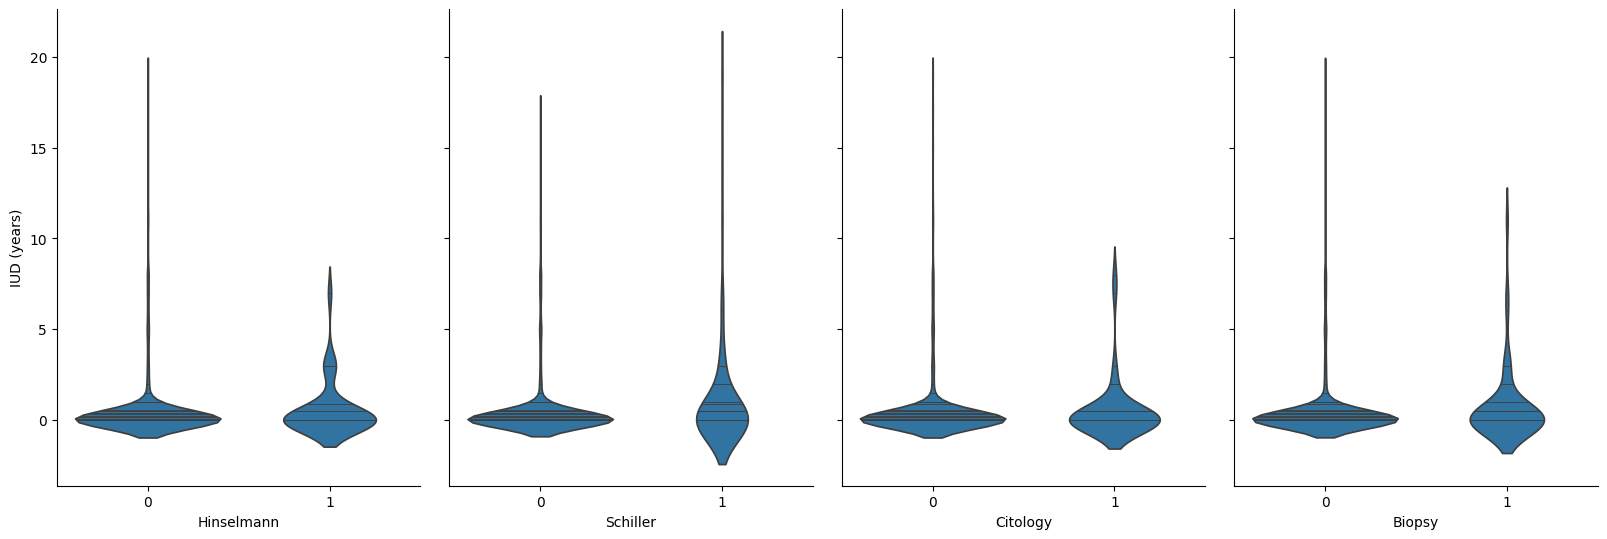

In [54]:
g = sns.PairGrid(cancer_df,
                 y_vars=['IUD (years)'],
                 x_vars= category_df,
                 aspect=.75, height=5.5)
g.map(sns.violinplot, palette="Accent", inner='stick');


In [55]:
HU_table = pd.crosstab(index=cancer_df["Biopsy"],
                          columns=(cancer_df["IUD (years)"]))

#HU_table.to_csv('IUD.csv',sep=',')

<Axes: xlabel='STDs (number)', ylabel='count'>

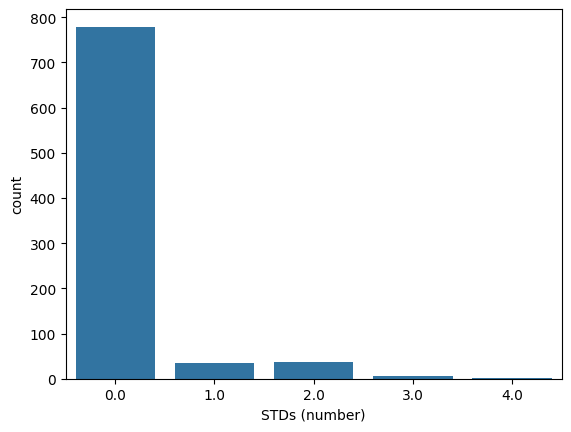

In [58]:
cancer_df['STDs (number)'] = round(pd.to_numeric(cancer_df['STDs (number)'], errors='coerce'))
sns.countplot(x='STDs (number)', data=cancer_df)

<Axes: xlabel='Hinselmann', ylabel='STDs (number)'>

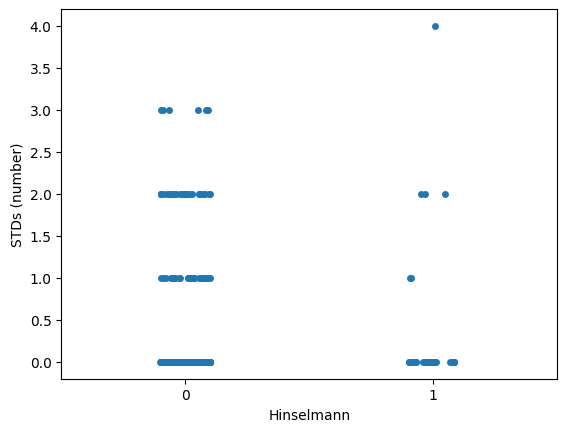

In [59]:
sns.stripplot(x='Hinselmann',y='STDs (number)',data=cancer_df)

In [60]:
std_table = pd.crosstab(index=cancer_df["Hinselmann"],
                          columns=cancer_df["STDs (number)"])

std_table

STDs (number),0.0,1.0,2.0,3.0,4.0
Hinselmann,,,,,
0,750,32,34,7,0
1,29,2,3,0,1


<Axes: xlabel='STDs (number)', ylabel='Hinselmann'>

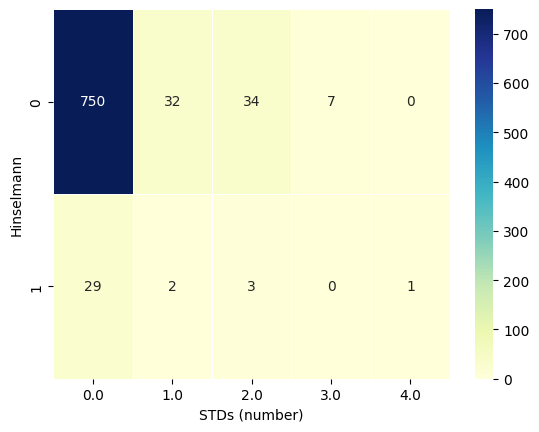

In [61]:
sns.heatmap(std_table,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [62]:
std_table_cit = pd.crosstab(index=cancer_df["Citology"],
                          columns=cancer_df["STDs (number)"])

std_table_sch = pd.crosstab(index=cancer_df["Schiller"],
                          columns=cancer_df["STDs (number)"])
std_table_bio = pd.crosstab(index=cancer_df["Biopsy"],
                          columns=cancer_df["STDs (number)"])

<Axes: xlabel='STDs (number)', ylabel='Citology'>

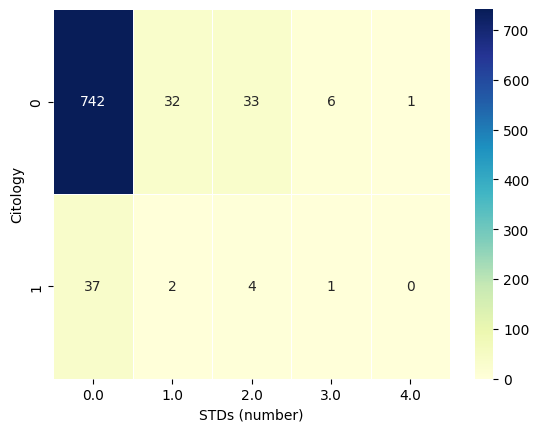

In [63]:
sns.heatmap(std_table_cit,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

<Axes: xlabel='STDs (number)', ylabel='Schiller'>

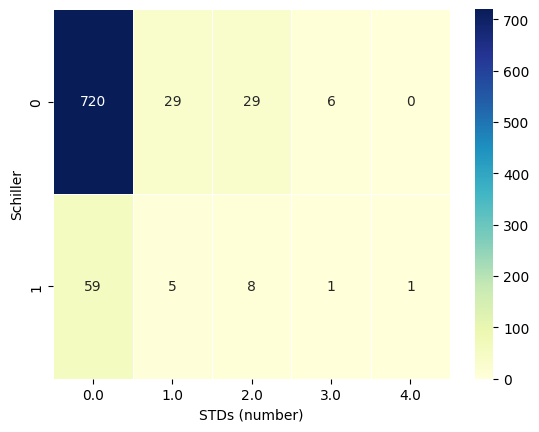

In [64]:
sns.heatmap(std_table_sch,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

<Axes: xlabel='STDs (number)', ylabel='Biopsy'>

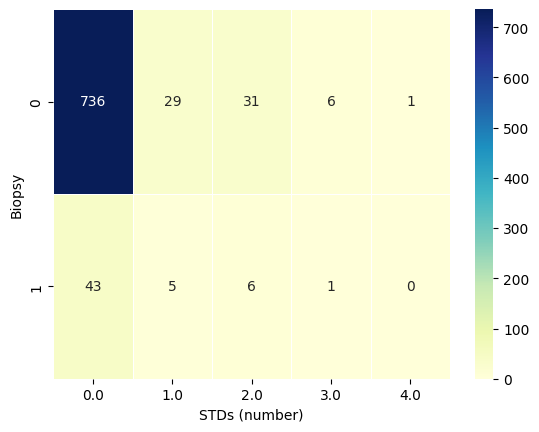

In [65]:
sns.heatmap(std_table_bio,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [66]:
cancer_df.drop('Dx',axis=1,inplace=True)

In [67]:
cancer_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology',
       'Biopsy', 'Combined_Column'],
      dtype='object')

In [68]:
cancer_df_features = cancer_df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)
cancer_df_label = pd.DataFrame(data=cancer_df['Hinselmann'])

In [69]:
cancer_df_label['Schiller'] = cancer_df['Schiller']
cancer_df_label['Citology'] = cancer_df['Citology']
cancer_df_label['Biopsy'] = cancer_df['Biopsy']

In [70]:
def cervical_cancer(cancer_label):

    hil, sch, cit, bio = cancer_label

    return hil+sch+cit+bio

cancer_df_label['cervical_cancer'] = cancer_df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cervical_cancer,axis=1)

In [71]:
cancer_df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
print('Value counts of each target variable:',cancer_df_label['cervical_cancer'].value_counts())
cancer_df_label = cancer_df_label.astype(int)
cancer_df_label = cancer_df_label.values.ravel()

print('Final feature vector shape:',cancer_df_features.shape)
print('Final target vector shape',cancer_df_label.shape)

Value counts of each target variable: 0    756
1     41
3     33
2     22
4      6
Name: cervical_cancer, dtype: int64
Final feature vector shape: (858, 27)
Final target vector shape (858,)


In [73]:
baseline_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/risk_factors_cervical_cancer.csv')

In [74]:
baseline_df['cervical_cancer'] = cancer_df_label

In [75]:
baseline_df = baseline_df.replace('?', np.NaN)

In [77]:
for feature in numerical_df:
    print(feature, '', pd.to_numeric(baseline_df[feature], errors='coerce').mean())
    feature_mean = round(pd.to_numeric(baseline_df[feature], errors='coerce').mean(), 1)
    baseline_df[feature] = pd.to_numeric(baseline_df[feature], errors='coerce').fillna(feature_mean)


Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.219721412585799
Smokes (packs/year)  0.4531439506492308
Hormonal Contraceptives (years)  2.2564192013893334
IUD (years)  0.5148043184885289
STDs (number)  0.17662682602921648


In [79]:
for feature in categorical_df:
    baseline_df[feature] = baseline_df[feature].fillna(1.0)


In [80]:
baseline_df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)

In [81]:
baseline_df_features = baseline_df.drop(['cervical_cancer','STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)
baseline_df_labels = baseline_df['cervical_cancer']

In [82]:
print(baseline_df_features.shape)
print(baseline_df_labels.shape)
#print(baseline_df_features)

(858, 30)
(858,)


In [85]:
#### cross validation on baseline model (using all 30 features) using Oversampling

from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


models = []
models.append(('LogisticRegMulti', LogisticRegressionCV(class_weight=None, multi_class='multinomial', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('LogisticRegOVR', LogisticRegressionCV(class_weight=None, multi_class='ovr', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('svm_linear', svm.LinearSVC(C=1.0,class_weight=None,multi_class='ovr',penalty='l2',max_iter=1000)))
models.append(('svm_rbf', svm.SVC(gamma='auto', C=1.2,degree=4, probability=True,kernel='rbf',decision_function_shape='ovr')))
models.append(('RandomForest',RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10,
                         oob_score=False, random_state=None, verbose=0,warm_start=False)
))

# evaluate each model in turn
results_all = []
names = []
dict_method_score = {}
scoring = 'accuracy'

## oversampling
from imblearn.over_sampling import SMOTE, ADASYN
baseline_df_features_ovr, baseline_df_labels_ovr = SMOTE().fit_resample(baseline_df_features, baseline_df_labels)
print("Results of the baseline model with 30 features:\n")
for name, model in models:
    skfold = StratifiedKFold(n_splits=5, shuffle=True)
    cv_results = model_selection.cross_val_score(model, baseline_df_features_ovr, baseline_df_labels_ovr, cv=skfold, scoring=scoring)
    results_all.append(cv_results)
    names.append(name)
    dict_method_score[name] = (cv_results.mean(), cv_results.std())
    print("{:s}: {:.3f} ({:.3f})".format(name, cv_results.mean(), cv_results.std()))


Results of the baseline model with 30 features:

LogisticRegMulti: 0.535 (0.005)
LogisticRegOVR: 0.484 (0.019)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


svm_linear: 0.367 (0.042)
svm_rbf: 0.832 (0.008)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomForest: 0.943 (0.005)


In [94]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Check and handle data types and missing values if any
# Replace 'cancer_df' with your actual DataFrame name
cancer_df_features_encoded = cancer_df_features.copy()  # Make a copy of the features DataFrame

# Iterate over each column and handle mixed data types
for column in cancer_df_features_encoded.columns:
    try:
        cancer_df_features_encoded[column] = cancer_df_features_encoded[column].astype(float)  # Convert all values to float
    except ValueError:  # Catch the error if conversion to float fails (indicating mixed data types)
        # Convert all values to strings if float conversion fails
        cancer_df_features_encoded[column] = cancer_df_features_encoded[column].astype(str)

# Check for missing values and handle them (replace with appropriate values)
cancer_df_features_encoded.fillna(0, inplace=True)  # Fill missing values with 0, adjust as needed

# Encode categorical variables
cancer_df_features_encoded = cancer_df_features_encoded.apply(LabelEncoder().fit_transform)

# Oversampling
from imblearn.over_sampling import SMOTE
cancer_df_features_ovr, cancer_df_label_ovr = SMOTE().fit_resample(cancer_df_features_encoded, cancer_df_label)

# Instantiate models
models = [
    ('LogisticRegMulti', LogisticRegressionCV(class_weight=None, multi_class='multinomial', solver='newton-cg', max_iter=1000, penalty='l2')),
    ('LogisticRegOVR', LogisticRegressionCV(class_weight=None, multi_class='ovr', solver='newton-cg', max_iter=1000, penalty='l2')),
    ('svm_linear', svm.LinearSVC(C=1.0, class_weight=None, multi_class='ovr', penalty='l2', max_iter=1000)),
    ('svm_rbf', svm.SVC(gamma='auto', C=1.2, degree=4, probability=True, kernel='rbf', decision_function_shape='ovr')),
    ('RandomForest', RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10,
                         oob_score=False, random_state=None, verbose=0, warm_start=False))
]

# Evaluate each model in turn
results_all = []
names = []
dict_method_score = {}
scoring = 'recall_weighted'

print('Results of the cross-validation on dataset with 26 features:\n')
for name, model in models:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)  # Set shuffle=True
    cv_results = model_selection.cross_val_score(model, cancer_df_features_ovr, cancer_df_label_ovr, cv=skfold, scoring=scoring)
    results_all.append(cv_results)
    names.append(name)
    dict_method_score[name] = (cv_results.mean(), cv_results.std())
    print("{:s}: {:.3f} ({:.3f})".format(name, cv_results.mean(), cv_results.std()))


Results of the cross-validation on dataset with 26 features:

LogisticRegMulti: 0.489 (0.021)
LogisticRegOVR: 0.480 (0.014)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


svm_linear: 0.380 (0.040)
svm_rbf: 0.891 (0.008)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomForest: 0.912 (0.008)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [105]:
## Building a model for future predictions:

random_forest_model = RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10,
                         oob_score=False, random_state=None, verbose=0, warm_start=False)

random_forest_model.fit(cancer_df_features, cancer_df_label)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=4)

In [120]:
### Predictions made on the training data:

print('Data Seen in training:', random_forest_model.predict(np.array([[51, 3, 17, 6, 34, 3.4, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])))
print('Data seen in training:', random_forest_model.predict(np.array([[38, 2, 15, 2, 0, 0, 0.5, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])))


Data Seen in training: [3]
Data seen in training: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [112]:
### Women with an age of 35, Number of sexual partners:5,First sexual intercourse:11,Num of pregnancies:2,Smokes (years):15, Smokes (packs/year):15,
### Hormonal Contraceptives (years): 0 and all the other features are 0
print('Testing the model',random_forest_model.predict(np.array([[35,5,11,2,15,15,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Testing the model [4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [113]:
### Women with an age of 48, Number of sexual partners:2,First sexual intercourse:15,Num of pregnancies:2,Smokes (years):0, Smokes (packs/year):0,
### Hormonal Contraceptives (years): 0.5,IUD (years):19,STDs:genital herpes:1 and all the other features are 0

print('Testing the model on Raw Data:',random_forest_model.predict(np.array([[48,2,15,2,0,0,0.5,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]])))

Testing the model on Raw Data: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [119]:
### Women with an age of 19, Number of sexual partners:1,First sexual intercourse:17,Num of pregnancies:1,Smokes (years):1, Smokes (packs/year):3.4,
### Hormonal Contraceptives (years): 0 and all the other features are 0

print('Testing the model on women with age less than 20:',random_forest_model.predict(np.array([[19,1,17,1,1,3.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Testing the model on women with age less than 20: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
